In [67]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [68]:
# clusting the different pixel colors, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

print(rgb2hex([255,0,0]))

#ff0000


In [69]:
def plot_image_info(path, k=10):
    #load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # resize image to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))
    
    #cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)
    
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())
    
    # subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    #print(label_counts.values())
    #print(color_labels)
    
    # plots
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(),labels=color_labels, colors=ordered_colors, startangle=90, shadow=1, autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

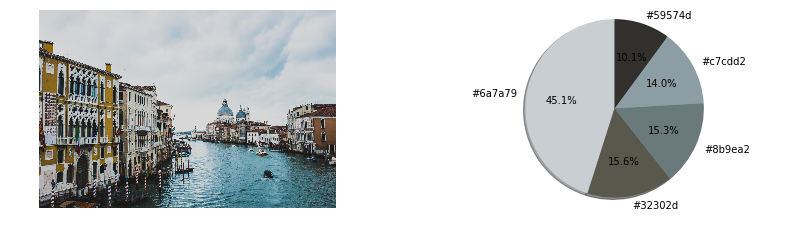

In [70]:
#plot image with k = 5
plot_image_info('data/Venice_1.jpg',5)

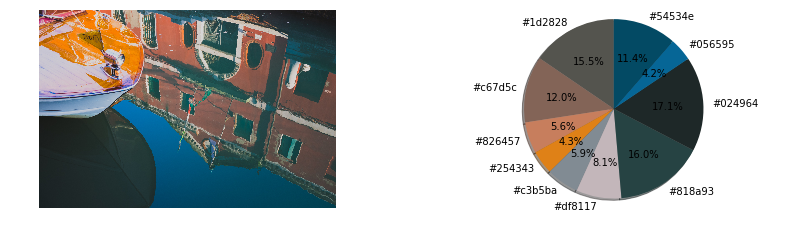

In [71]:
#plot image with k = 10 (default)
plot_image_info('data/Venice_2.jpg')

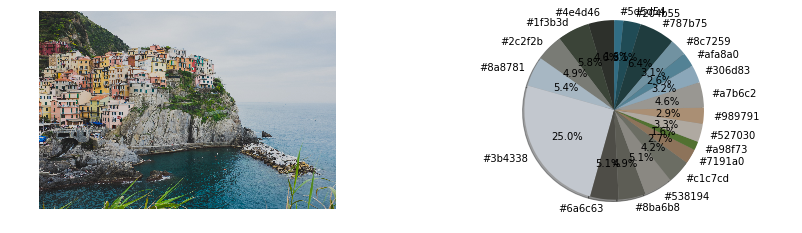

In [72]:
#plot image with k = 20
plot_image_info('data/Cinque_Terre_1.jpg',20)